# Counting Photons

In this notebook, we will study the statistics of counting photons, which is described by a Poisson process. The idea is that photoreceptors detect light by absorbing photons, which are discrete events. Since the arrivals of photons are random in time, the number of such events within a short period can fluctuate. We would like to study the statistics of those events.

This random process of receiving photons can be described by an average rate of photon arrival, $k$. By definition, it means that over a *long* period $T$ ($T \gg 1/k$), there will be $k T$ events. However, those events would be distributed randomly and independently over the period $T$. Let us first simulate such a process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
k = 3.
T = 10000

N = int(k*T)    # number of events during the period T
events = np.random.rand(N) * T    # draw N random numbers uniformly distributed between 0 and T
# events.sort()    # sort events in increasing order in time

## Statistics of the number of events

If we look at *short* periods, of length $\Delta t$, then the number of events within each of those periods would vary from time to time. To see this, let us pick many short windows of length $\Delta t$ and count the events within each of them. Since the events are independent and uniformly distributed, it does not matter where we put the windows. So we might as well divide the long period $T$ into consecutive short windows. Counting the number of events within every time window can be done using the `histogram` function.

In [3]:
dt = 1
bins = np.arange(0, T+dt, dt)    # specify edges of the bins, including left- and right-most edges
counts = np.histogram(events, bins=bins)[0]    # count number of values within every bin (we did not have to sort `events`)

Let us plot the actual time of events and their counts within the time windows.

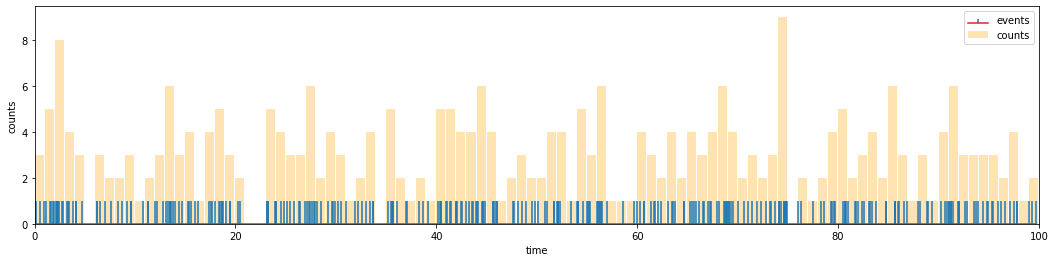

In [4]:
T1 = 100    # due to space limit, only plot up to time T1
events1 = events[events<T1]    # subset of events that happened before T1

plt.figure(figsize=(18,4))
plt.stem(events1, np.ones(len(events1)), markerfmt='none', label='events')    # "stem plot"
plt.bar(bins[:T1], counts[:T1], width=0.9*dt, color='orange', align='edge', alpha=0.3, label='counts')
plt.xlim(0, T1)
plt.xlabel('time')
plt.ylabel('counts')
plt.legend()
plt.show()

As we can see from the figure, the number of events within a time window, i.e., the height of the bars, varies over time. We are interested in the statistics of this number, so let us next estimate its distribution. This amounts to counting the "relative number of occurences" of the "number of events", which can be done by making a histogram of the bar heights in the above plot, i.e., a histogram of a histogram... However, since the number of events is always an integer, there is a simpler way of doing the counts, using the numpy `bincount` function.

In [5]:
# dist = np.histogram(counts, bins=np.arange(-0.5,10,1))    # count using `histogram`
dist = np.bincount(counts)    # count integers using `bincount`
dist = dist / np.sum(dist)    # normalize to get the distribution

Let us now plot the distribution of the number of events within a time window $\Delta t$.

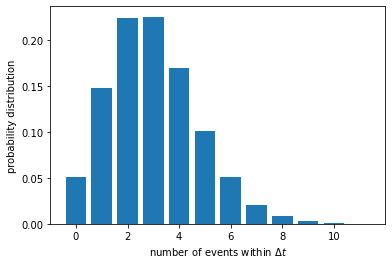

In [6]:
plt.figure()
plt.bar(np.arange(len(dist)), dist)
plt.xlabel(r'number of events within $\Delta t$')
plt.ylabel('probability distribution')
plt.show()

We can calculate the mean and variance of this distribution.

In [7]:
mean = np.mean(counts)
print(f'mean number of events within dt = {mean}')
var = np.var(counts)
print(f'variance = {var}')

mean number of events within dt = 3.0
variance = 3.0016


The mean number of events is simply $k \Delta t$, as expected. We are more interested in the variance, which turns out to be very close to the mean.

This is the hallmark of a *Poisson distribution*. In fact, when we said in the beginning that the random process is described by a Poisson process, it basically means that the distribution of the number of events should be a Poisson distribution. The shape of such a distribution is completely determined by its mean, $\mu$, and can be written as:
\begin{equation}
P(n) = \frac{\mu^n}{n!} \, \mathrm{e}^{-\mu}
\end{equation}

We may plot this distribution function and overlay it on top of the empirically found distribution above. In our case, $\mu = k \, \Delta t$.

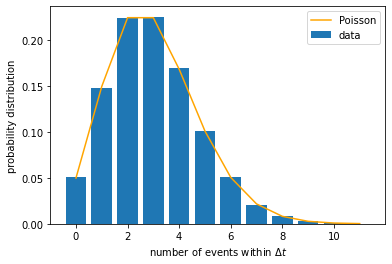

In [8]:
mu = k*dt
n_array = np.arange(len(dist))
p_array = st.poisson.pmf(n_array, mu)    # use pre-defined Poisson distribution from `scipy.stats` package

plt.figure()
plt.bar(n_array, dist, label='data')
plt.plot(n_array, p_array, color='orange', label='Poisson')
plt.xlabel(r'number of events within $\Delta t$')
plt.ylabel('probability distribution')
plt.legend()
plt.show()

What happens if we choose a longer time window? We expect the mean number of events within each window to increase linearly with $\Delta t$, and so does the variance. Let us check if this is the case. We need to repeat the calculations above for different $\Delta t$.

In [9]:
dt_list = np.arange(1, 10)    # different sizes for the time window
mean_list = []    # collect means
var_list = []    # collect variances

for dt in dt_list:
    bins = np.arange(0, T/2, dt)    # only use first half of total time; otherwise the mean will be exactly k
    counts = np.histogram(events, bins=bins)[0]
    mean = np.mean(counts)
    var = np.var(counts)
    mean_list.append(mean)
    var_list.append(var)

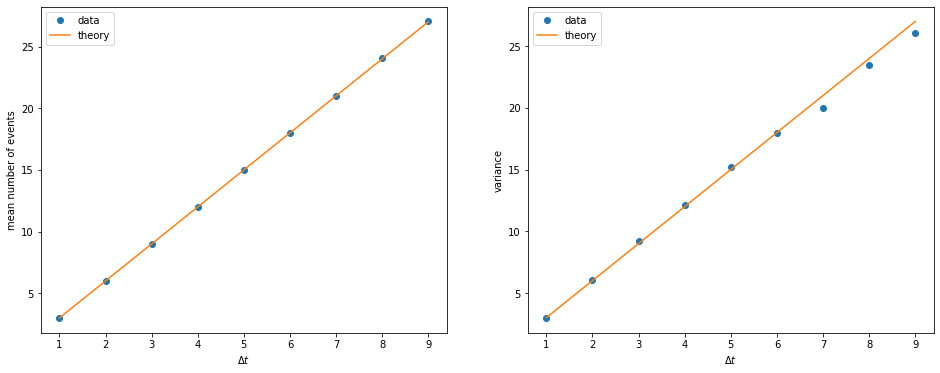

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(dt_list, mean_list, 'o', label='data')
ax[0].plot(dt_list, k*dt_list, label='theory')
ax[0].set_xlabel(r'$\Delta t$')
ax[0].set_ylabel('mean number of events')
ax[0].legend()
ax[1].plot(dt_list, var_list, 'o', label='data')
ax[1].plot(dt_list, k*dt_list, label='theory')
ax[1].set_xlabel(r'$\Delta t$')
ax[1].set_ylabel('variance')
ax[1].legend()
plt.show()

We can also plot the variance versus the mean. A Poisson distribution will have them equal to each other.

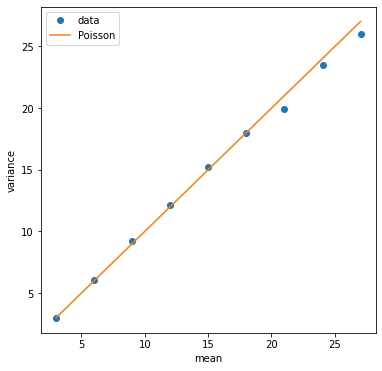

In [11]:
plt.figure(figsize=(6,6))
plt.plot(mean_list, var_list, 'o', label='data')
plt.plot(mean_list, mean_list, label='Poisson')
plt.xlabel('mean')
plt.ylabel('variance')
plt.legend()
plt.show()

## Probability of having more than $K$ events

In the experiment of (Hecht, Shlaer, & Pirenne, 1942), they sent repeated impulses of light to an observer and recorded how often he reported seeing the light. They then varied the intensity of the light and measured how the frequency of seeing the light depended on the amount of light in each impulse. The light intensity is proportional to the rate of photon arrival, and the exposure time is like the short time window in the analysis above. Therefore, for a given intensity and exposure time of the light, the number of photons in an impulse follows a Poisson distribution $P(n)$. If we assume that the observer can see the light only if the eye absorbed $K$ photons or more, then the "frequency of seeing" is given by the probability that there are $n \geq K$ photons in the impulse, i.e., $P(n \geq K) = \sum_{n=K}^{\infty} P(n)$. (In reality not all photons that arrive at the eye are absorved, as there is a finite efficiency by which the eye absorbs photons. But this would not change the math, as we can simply think of $n$ as the number of photons that *are absorbed* rather than arrive.)

Let us simulate this process to find the frequency of seeing the light. Suppose our threshold is $K = 7$. We have to choose an exposure time for each impulse, i.e., the size of our time window, such as $\Delta t = 2$. For the photon arrival rate $k = 3$ used above, each window would have $\mu = k \Delta t = 6$ photons on average. We would like to know how many windows have more than $K = 7$ photons. For that, we will first recount the number of events in each window and then screen for windows with $n \geq K$.

In [12]:
dt = 2    # window size
mu = k * dt    # mean number of events in each window
bins = np.arange(0, T, dt)
counts = np.histogram(events, bins=bins)[0]

K = 7    # threshold
above = np.sum(counts >= K)    # number of windows with >=K events
freq = above / len(counts)    # frequency of having >=K events
print(f'mean number of events in each window = {mu}')
print(f'frequency of having {K} events or more = {freq}')

mean number of events in each window = 6.0
frequency of having 7 events or more = 0.3986797359471894


Now we would like to see how this frequency depends on the light impulse. Instead of varying the intensity (rate $k$), we can equivalently vary the exposure time (time window $\Delta t$). We will plot the frequency of seeing the light as a function of the mean number of photons, $\mu = k \Delta t$.

In [13]:
dt_list = np.arange(0.5, 10, 0.5)    # different sizes for the time window
mean_list = []    # list to store mean number of events
freq_list = []    # list to store frequency of having >= K events

for dt in dt_list:
    mean = k * dt
    bins = np.arange(0, T, dt)
    counts = np.histogram(events, bins=bins)[0]
    above = np.sum(counts >= K)
    freq = above / len(counts)
    mean_list.append(mean)
    freq_list.append(freq)

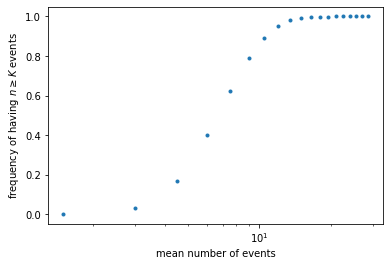

In [14]:
plt.figure()
plt.plot(mean_list, freq_list, '.')
plt.xscale('log')    # use log scale
plt.xlabel('mean number of events')
plt.ylabel(r'frequency of having $n \geq K$ events')
plt.show()

Let us compare to the expected frequency, which is given by the probability $P(n \geq K)$. To calculate the latter, note that it is simply 1 minus the cumulative distribution function, $C(K-1) = \sum_{n=0}^{K-1} P(n)$. We can compute this function by calling `scipy.stats.poisson.cdf()`.

In [15]:
mu_array = np.geomspace(0.5, 50, 101)    # like `linspace()` but points are uniform in log scale
PK_array = []    # list to store values of P(n>=K) for each mu

for mu in mu_array:
    PK = 1 - st.poisson.cdf(K-1, mu)    # use Poisson CDF to calculate P(n>=K)
    PK_array.append(PK)    # store the value of P(n>=K) for the given mu

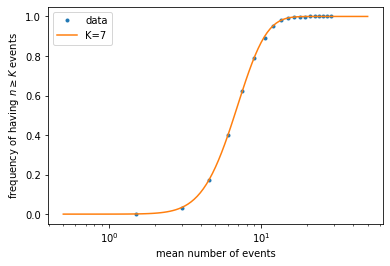

In [16]:
plt.figure()
plt.plot(mean_list, freq_list, '.', label='data')    # plot simulated data
plt.plot(mu_array, PK_array, label=f'K={K}')    # plot theoretical curve
plt.xscale('log')
plt.xlabel('mean number of events')
plt.ylabel(r'frequency of having $n \geq K$ events')
plt.legend()
plt.show()

What if we have the data but do not know the actual value of $K$ that generated the data? This is the situation in the experiment of (Hecht, Shlaer, & Pirenne, 1942). What we can do is to plot theoretical curves for different values of the threshold $K$, then compare to the data to find which value fits better.

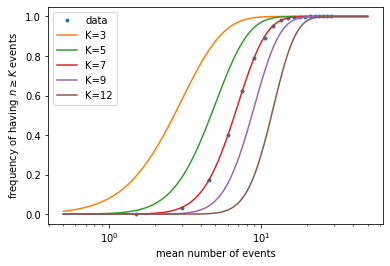

In [17]:
K_list = [3, 5, 7, 9, 12]    # list of K values to try

plt.figure()
plt.plot(mean_list, freq_list, '.', label='data')    # plot simulated data
for K in K_list:    # for each K value, repeat the steps above
    mu_array = np.geomspace(0.5, 50, 101)
    PK_array = []
    for mu in mu_array:
        PK = 1 - st.poisson.cdf(K-1, mu)
        PK_array.append(PK)
    plt.plot(mu_array, PK_array, label=f'K={K}')
plt.xscale('log')
plt.xlabel('mean number of events')
plt.ylabel(r'frequency of having $n \geq K$ events')
plt.legend()
plt.show()

Note that, in the experiment, they did not know what was the mean number of photons absorbed by the eye, but only that it should be proportional to the light intensity. In other words, the x-axis values of the data is multiplied by an unknown factor. To overcome that problem, they plotted the data in log scale on the x-axis (which is what we did above), so that an unknown factor amounts to shifting the data horizontally. We can equivalently shift the theoretical curves horizontally, for example by making them all cross at the point $x = 6, y = 0.39$. Since different values of $K$ result in different slopes in the rising part of the curves, by comparing the slopes to the data we can find the best $K$ value.

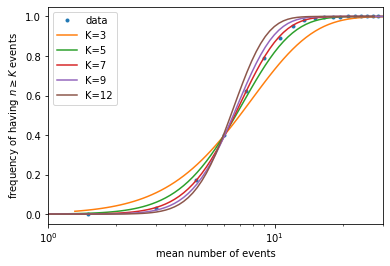

In [18]:
K_list = [3, 5, 7, 9, 12]    # list of K values to try

plt.figure()
plt.plot(mean_list, freq_list, '.', label='data')    # plot simulated data
for K in K_list:    # for each K value, repeat the steps above
    mu_array = np.geomspace(0.5, 50, 101)
    PK_array = []
    for mu in mu_array:
        PK = 1 - st.poisson.cdf(K-1, mu)
        PK_array.append(PK)
    i = np.argmin((np.array(PK_array) - 0.39)**2)    # find the point on the curve closest to y=0.39
    mu_array = mu_array / mu_array[i] * 6    # shift the curve along x-axis so that this point is moved to x=6
    plt.plot(mu_array, PK_array, label=f'K={K}')
plt.xscale('log')
plt.xlim(1, 30)
plt.xlabel('mean number of events')
plt.ylabel(r'frequency of having $n \geq K$ events')
plt.legend()
plt.show()

It can be seen that $K \sim 7$ gives the best fit. In the experiment, with less accurate data, they were still able to narrow $K$ down to around 5-7, which means our eyes are sensitive enough to detect as few as several photons!

## Statistics of waiting time

So far we have studied the statistics of the number of events within a given amount of time. Now let us switch our attention to the time interval between two consecutive events, or the "waiting time" before the next event.

We can calculate such waiting times from the same dataset that we simulated above.

In [19]:
events.sort()    # here we must sort the events first
intervals = np.diff(events)    # this numpy function calculates the difference between consecutive array elements

Let us plot the distribution of those waiting times.

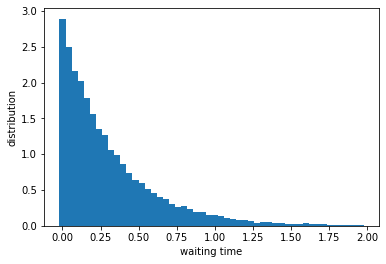

In [20]:
nbins = 50    # number of bins
bins = np.linspace(0, 2, nbins+1)    # create bins between 0 and 2
wait_dist = np.histogram(intervals, bins=bins, density=True)[0]    # make histogram of waiting times

plt.figure()
plt.bar(bins[:-1], wait_dist, width=np.diff(bins))
plt.xlabel('waiting time')
plt.ylabel('distribution')
plt.show()

This looks like an exponentially decaying function. To check, let us plot the y-axis in log scale and fit a line.

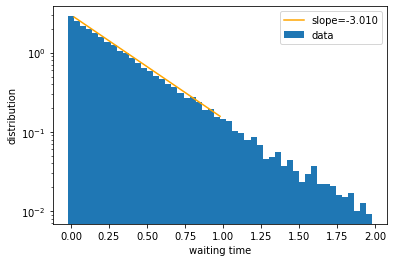

In [21]:
x_data = (bins[:nbins//2] + bins[1:nbins//2+1]) / 2    # center of the bins; use only first half of data to avoid noisy tail
y_data = np.log(wait_dist[:nbins//2])    # height of the bins in log scale
fit = np.polyfit(x_data, y_data, 1)    # this numpy function fits polynomial of degree 1, i.e., a line
val = np.polyval(fit, x_data)    # this numpy function evaluates the fitted function at given points

plt.figure()
plt.bar(bins[:-1], wait_dist, width=np.diff(bins), label='data')
plt.plot(x_data, np.exp(val), color='orange', label=f'slope={fit[0]:.3f}')
plt.yscale('log')
plt.xlabel('waiting time')
plt.ylabel('distribution')
plt.legend()
plt.show()

We see that the line fit is pretty good, which suggests that the distribution of waiting times is exponential. Indeed, it can be mathematically shown that the waiting time, $\tau$, of a Poisson process follows the exponential distribution:
\begin{equation}
P(\tau) = k \, \mathrm{e}^{-k \tau}
\end{equation}
where $k$ is the event rate as defined earlier. Therefore the slope in the log plot is expected to be equal to $-k$, as borne out by our numerical results.